In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
def leer_datos(ruta):
    df = pd.read_csv(ruta,sep=',')
    return df

In [59]:
data = leer_datos("/content/drive/MyDrive/data_evaluacion.csv")
data.head(30)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [60]:
# Seleccionar columnas numéricas
numerical_columns = ['39', '77516', '13', '2174', '0', '40']
data_numerical = data[numerical_columns]

# Normalizar los datos
scaler = StandardScaler()
data_numerical_normalized = scaler.fit_transform(data_numerical)

In [61]:
# Crear un DataFrame con los datos normalizados
data_numerical_normalized_df = pd.DataFrame(data_numerical_normalized, columns=numerical_columns)

# Renombrar las columnas del DataFrame normalizado
data_numerical_normalized_df.rename(columns={
    '39': 'Age',
    '77516': 'HoursPerWeek',
    '13': 'EducationLevel',
    '2174': 'PostalCode',
    '0': 'Indicator',
    '40': 'MaxHours'
}, inplace=True)

# Reemplazar las columnas originales por las normalizadas
data_normalized = data.copy()
data_normalized[list(data_numerical_normalized_df.columns)] = data_numerical_normalized_df

# Cambiar el nombre de la columna
data_normalized.rename(columns={'<=50K': 'salary'}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el cambio
data_normalized.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,salary,Age,HoursPerWeek,EducationLevel,PostalCode,Indicator,MaxHours
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.828300,-1.007127,1.136539,-0.144799,-0.217129,-2.213010
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,-0.046940,0.246012,-0.419313,-0.144799,-0.217129,-0.034087
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,1.047111,0.426642,-1.197239,-0.144799,-0.217129,-0.034087
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,-0.776308,1.408510,1.136539,-0.144799,-0.217129,-0.034087
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,-0.119877,0.898798,1.525502,-0.144799,-0.217129,-0.034087


# BAYES

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [63]:
# Definir características categóricas y numéricas
categorical_features = ['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'United-States']
numerical_features = ['Age', 'HoursPerWeek', 'EducationLevel', 'PostalCode', 'Indicator', 'MaxHours']

In [64]:
# Preprocesar los datos
  # Cambiar sparse a False para obtener datos densos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),  # Usar MinMaxScaler para evitar valores negativos
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features)  # Convertir a matriz densa
    ])

In [65]:
# Crear el pipeline para el modelo de Naive Bayes
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

In [66]:
# Dividir en conjunto de entrenamiento y prueba
X = data_normalized.drop('salary', axis=1)
y = data_normalized['salary']


In [67]:
# Encode labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
from sklearn.metrics import accuracy_score

# Entrenar el modelo
pipeline_nb.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = pipeline_nb.predict(X_test)
# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la exactitud
print(f'precisión: {accuracy:.2f}')
# Evaluar el modelo
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


precisión: 0.82
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      7464
        >50K       0.62      0.62      0.62      2305

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



Detalles Importantes:
MinMaxScaler: Escala los datos numéricos al rango [0, 1], evitando así valores negativos.
OneHotEncoder: sparse=False para obtener una matriz densa.

Matriz de Confusión:
[[6596  868]
 [ 884 1421]]


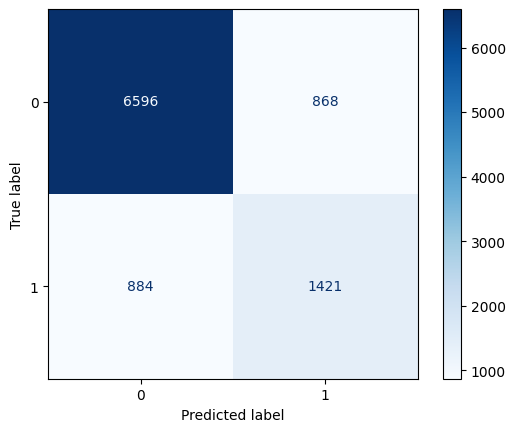

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=pipeline_nb.classes_)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Mostrar la matriz de confusión con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

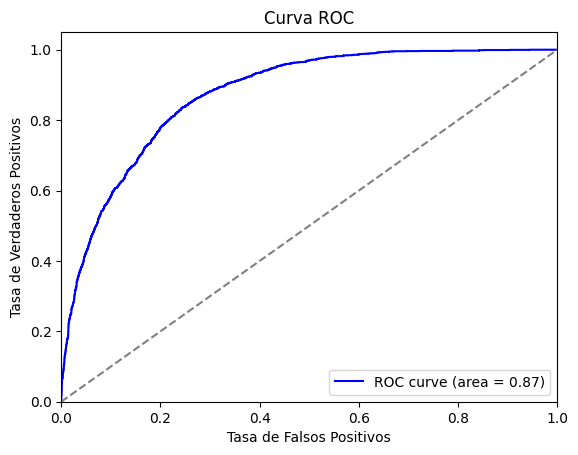

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades en el conjunto de prueba
y_scores = pipeline_nb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (>50K)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()